# Importing dataset and libs

In [1]:
!wget -O iris.csv 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'

--2022-09-01 08:46:32--  https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv
Resolvendo gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Conectando-se a gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 3858 (3,8K) [text/plain]
Salvando em: “iris.csv”

iris.csv            100%[===================>]   3,77K  --.-KB/s    em 0,003s  

2022-09-01 08:46:33 (1,17 MB/s) - “iris.csv” salvo [3858/3858]



In [3]:
!pip3 install minisom

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [4]:
from IPython.display import Image, display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from minisom import MiniSom
import time

# EDA

In [5]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [107]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

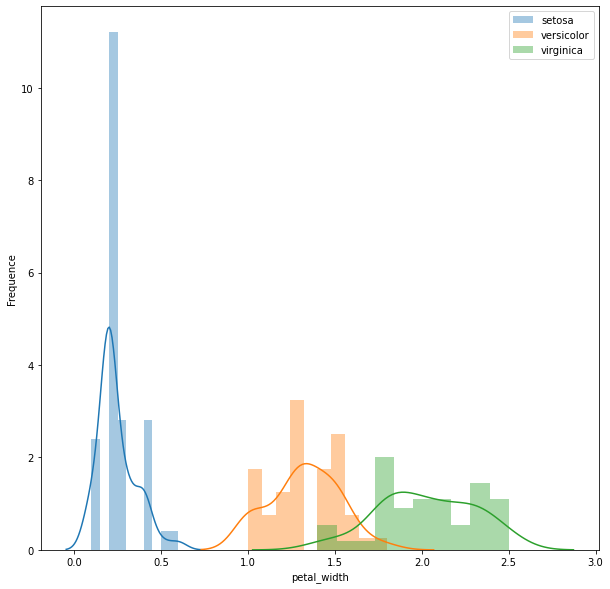

In [118]:
plt.figure(figsize=(10, 10))
sns.distplot(df.loc[df['species']=='setosa']['petal_width'], label='setosa', bins=10)
sns.distplot(df.loc[df['species']=='versicolor']['petal_width'], label='versicolor', bins=10)
sns.distplot(df.loc[df['species']=='virginica']['petal_width'], label='virginica', bins=10)
plt.legend()
plt.ylabel('Frequence')
plt.show()

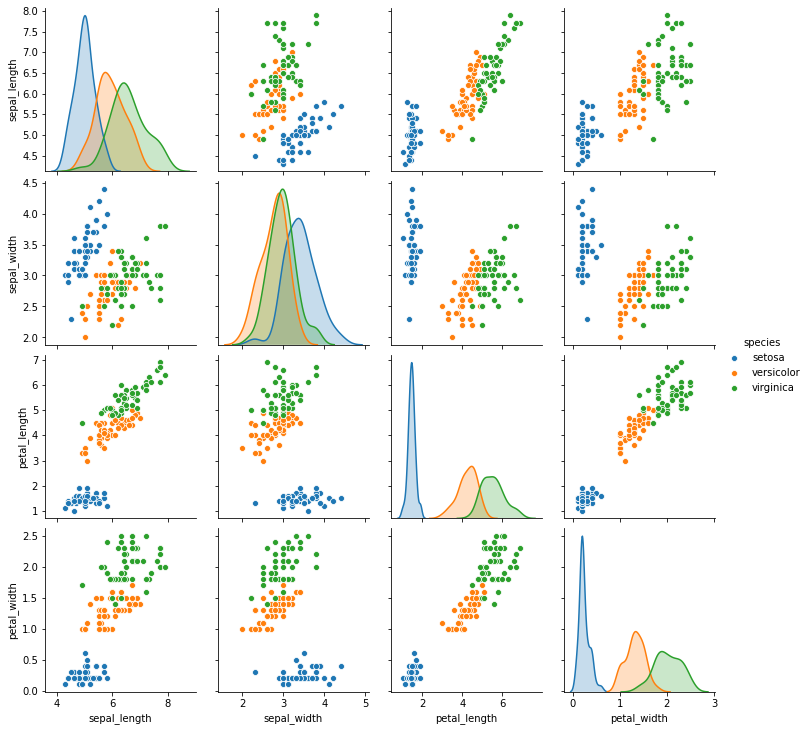

In [7]:
sns.pairplot(df, hue='species')

In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Data preprocessing

In [19]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
df_X = df.drop(labels=['species'], axis='columns')
df_y = df['species']
df_X 

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(df_X)

new_columns = ['scal_sepal_length','scal_sepal_width','scal_petal_length','scal_petal_width']
new_df_X = pd.DataFrame(data=X_transformed, columns=new_columns)
new_df_X

,scal_sepal_length,scal_sepal_width,scal_petal_length,scal_petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_y = le.fit_transform(df_y)
new_df_y = pd.DataFrame(data=encoded_y, columns=['species'])
new_df_y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [24]:
le.inverse_transform([0, 1, 2])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Train/test split

In [25]:
rseed = 21

In [26]:
aux = new_df_X.copy()
aux['species'] = new_df_y
aux = aux.sample(frac=1, random_state=rseed).reset_index(drop=True)

new_df_y = aux['species']
new_df_X = aux.drop(axis=1, columns=['species'])

len(new_df_X), len(new_df_y)

(150, 150)

# Creating the model

## Self Organizing Maps

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df_X, new_df_y)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [28]:
%matplotlib inline

In [58]:
def create_SOM(x, y, input_len, sigma, learning_rate):
  new_df_X_array = np.array(new_df_X)
  return MiniSom(
    x = x,
    y = y,
    input_len = input_len,
    sigma = sigma,
    learning_rate = learning_rate,
    random_seed=33)

def train_SOM(som, X, iterations):
  som.pca_weights_init(X)
  som.train(X, iterations)
  return

In [128]:
print(som.winner(setosa_samp))

(7, 0)


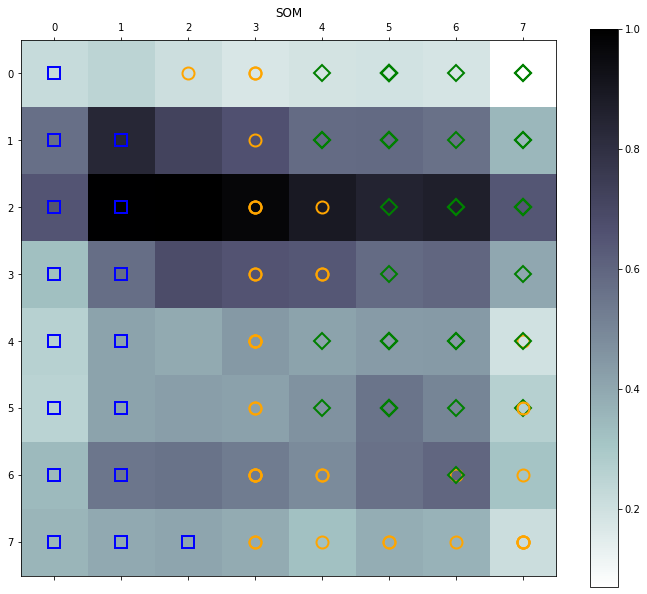

In [132]:
setosa_samp = np.array([5.1, 3.5, 1.4, 0.2])

def print_distances_wns_labels(som, X, y):
  plt.figure(figsize=(12,10))
  plt.matshow(som.distance_map(), fignum=1, cmap='bone_r')
  plt.colorbar()

  markers = ['s','o','D']
  colors = ['b', 'orange', 'g']
  labels=le.inverse_transform([0, 1, 2])
  for i,curr_x in enumerate(X):
    w = som.winner(curr_x)
    plt.plot(
        w[0],
        w[1],
        marker=markers[y[i]],
        markerfacecolor='None',
        markeredgecolor=colors[y[i]],
        markersize=12,
        markeredgewidth=2,
        label=labels[y[i]])
  plt.title("SOM")
  # plt.axis([0, som._weights.shape[0], 0, som._weights.shape[1]])
  plt.show()
  return

print_distances_wns_labels(som=som, X=X_train, y=y_train)

In [59]:
def create_label_map(som, x_dim, y_dim, X, y):
  _x, _y = x_dim, y_dim
  
  # criar a matriz de listas
  map = np.empty((_x, _y), dtype=object)
  for r in range(_x):
    for c in range(_y):
      map[r][c] = []
      
  # preencher as listas com as labels de cada neuronio    
  for i,curr_x in enumerate(X):
    w = som.winner(curr_x)
    map[w[0]][w[1]].append(y[i])

  # criar a matriz de labels
  label_map = np.empty((_x, _y), dtype=np.int32)

  # escolher a label vencedora de cada neuronio
  for r in range(map.shape[0]):
    for c in range(map.shape[1]):
      if map[r][c] == []:
        label_map[r][c] = -1
        continue

      freq_dict = {}
      for elem in map[r][c]:
        if not elem in freq_dict:
          freq_dict[elem] = 1
        else:
          freq_dict[elem] += 1

      sorted_list = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
      label_map[r][c] = np.int32(int(sorted_list[0][0]))
  return label_map

def print_label_map(label_map):
  plt.figure(figsize=(12,10))
  plt.pcolor(som.distance_map(), cmap='bone_r')

  markers = ['o','s','D']
  colors = ['r', 'g', 'b']
  for r in range(label_map.shape[0]):
    for c in range(label_map.shape[1]):
      if label_map[r][c] == -1:
        continue
      plt.plot(r+0.5, c+0.5, marker=markers[label_map[r][c]], markerfacecolor='None',markeredgecolor=colors[label_map[r][c]], markersize=12, markeredgewidth=2)

  plt.colorbar()
  plt.show()
  return


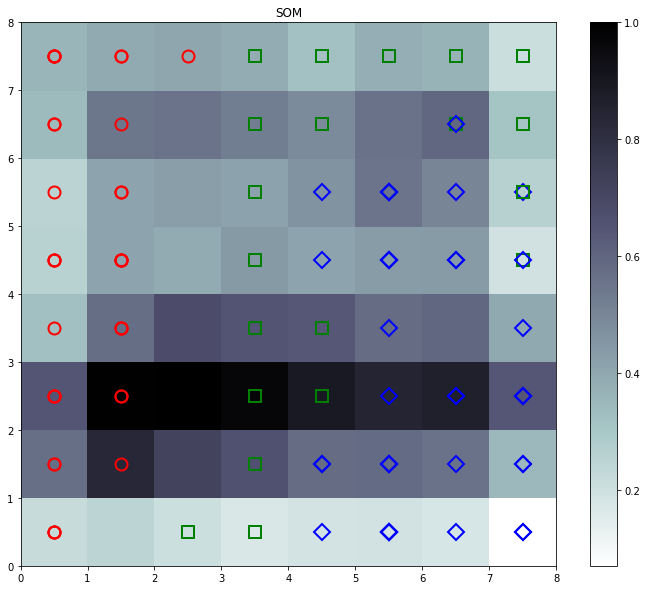

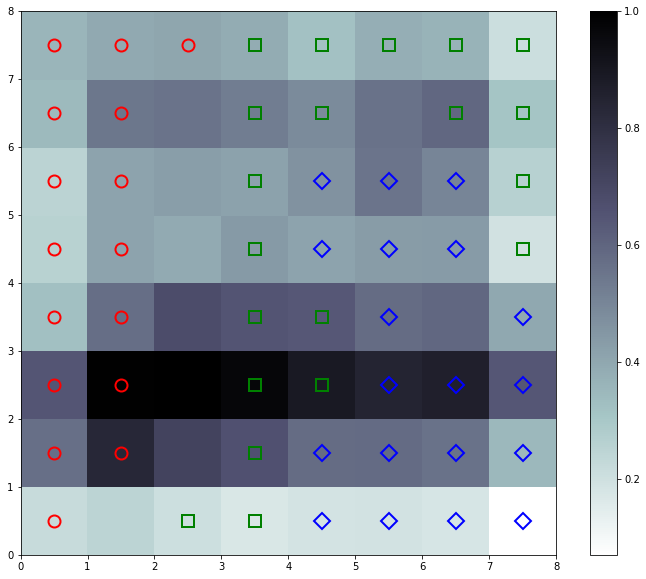

In [91]:
x = 8
y = 8
input_len = X_train.shape[1]
sigma = 1.8
learning_rate = 0.8
seed=31

iterations = 10000

som = create_SOM(x=x, y=y, input_len=input_len, sigma=sigma, learning_rate=learning_rate)
train_SOM(som=som, X=X_train, iterations=iterations)
print_distances_wns_labels(som=som, X=X_train, y=y_train)
label_map = create_label_map(som=som, x_dim=x, y_dim=y, X=X_train, y=y_train)
print_label_map(label_map)

### Testando funções de plot

In [99]:
som.distance_map()

array([[0.22139669, 0.25001216, 0.20504609, 0.17290918, 0.18760833,
        0.19343376, 0.17996755, 0.07042683],
       [0.5692303 , 0.8341979 , 0.71817714, 0.66231507, 0.58140248,
        0.58400978, 0.56086686, 0.35230958],
       [0.64888075, 0.99611935, 1.        , 0.97153443, 0.89276499,
        0.84827197, 0.86572851, 0.64653053],
       [0.32554658, 0.5733747 , 0.68290846, 0.65223721, 0.64162049,
        0.57937129, 0.59692352, 0.40074496],
       [0.25999598, 0.41441179, 0.39010053, 0.44407017, 0.41382014,
        0.43497254, 0.43956347, 0.19624762],
       [0.25327863, 0.41460567, 0.42790664, 0.41714567, 0.46413348,
        0.55433177, 0.50556007, 0.26555366],
       [0.3431747 , 0.54794333, 0.5595421 , 0.52830279, 0.48449832,
        0.56388885, 0.593705  , 0.31072052],
       [0.35935223, 0.39473358, 0.40643204, 0.38879124, 0.32306258,
        0.38154169, 0.36681547, 0.21079939]])

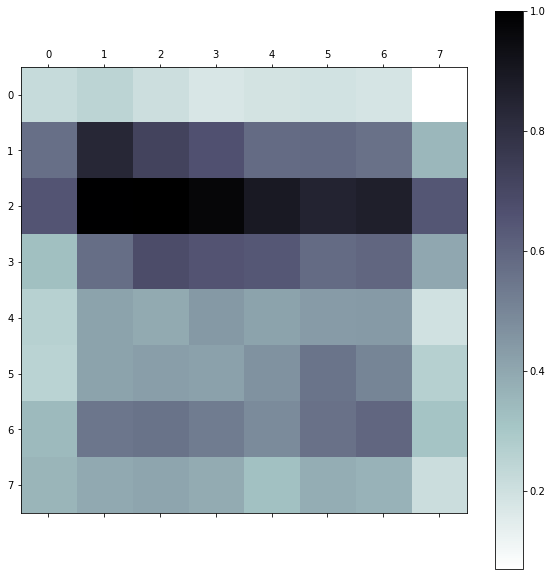

In [100]:
plt.figure(figsize=(10,10))
plt.matshow(som.distance_map(), fignum=1, cmap='bone_r')
plt.colorbar()
plt.show()

In [ ]:
for row in range(som.distance_map().shape[0]):
  print(som.distance_map()[row])

[0.20877924 0.40542938 0.59806498 0.33166834 0.30892622 0.26631584
 0.35308525 0.21637872]
[0.34595366 0.61650463 0.60105914 0.63881898 0.4907136  0.46689436
 0.68320583 0.47883145]
[0.27965484 0.5341045  0.50824051 0.48929295 0.48319179 0.54117006
 0.72384062 0.6140825 ]
[0.26486923 0.43425268 0.44189275 0.45340649 0.44164188 0.44590055
 0.63657892 0.40149394]
[0.43986107 0.74968021 0.92435621 0.7097393  0.62115208 0.49017351
 0.46459841 0.28011249]
[0.65519349 1.         0.81448288 0.80756521 0.8110578  0.88237972
 0.9580534  0.58112786]
[0.46775544 0.55706813 0.40241874 0.40083904 0.56610935 0.81254133
 0.96715713 0.70750784]
[0.14581766 0.24081322 0.23159135 0.20117394 0.22871094 0.25917976
 0.34222098 0.34532543]


### Continuação do modelo

In [102]:
def som_predict(som, x_data):
  preds = np.empty(x_data.shape[0], dtype=np.int32)
  for r in range(x_data.shape[0]):
    w = som.winner(x_data[r])
    preds[r] = label_map[w[0]][w[1]]
  return preds

In [103]:
def print_predicts(som, x_data):
  preds = np.empty(x_data.shape[0], dtype=np.int32)
  for r in range(x_data.shape[0]):
    w = som.winner(x_data[r])
    preds[r] = label_map[w[0]][w[1]]
  return

In [104]:
preds = som_predict(som, X_test)
preds

array([0, 2, 1, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1], dtype=int32)

In [105]:
from sklearn.metrics import classification_report


print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

